In [1]:
#libs for managing data
import numpy as np
import pandas as pd

#libs for ML regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

#libs for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#exporting ML model
import pickle

# Importing Preprocessed Test and Train Dataset

In [2]:
# Load the datasets using your provided file paths
loan_data_inputs_train = pd.read_csv('C:/Users/Lenovo/Downloads/loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train = pd.read_csv('C:/Users/Lenovo/Downloads/loan_data_targets_train.csv', index_col=0)
loan_data_inputs_test = pd.read_csv('C:/Users/Lenovo/Downloads/loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test = pd.read_csv('C:/Users/Lenovo/Downloads/loan_data_targets_test.csv', index_col=0)

# Exploring data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
221233,221233,1223440,1464089,16000,16000,16000.0,36 months,17.27,572.60,D,...,0,0,0,1,0,0,0,0,0,0
378461,378461,17654338,19786836,26350,26350,26350.0,60 months,16.99,654.73,D,...,1,0,0,1,0,0,0,0,0,0
117522,117522,6166624,7648747,4800,4800,4800.0,36 months,13.68,163.31,C,...,0,0,0,0,0,0,0,0,0,1
352107,352107,20689629,22962303,14000,14000,14000.0,60 months,15.61,337.56,D,...,0,0,0,1,0,0,0,0,0,0
253931,253931,34743135,37436415,15000,15000,15000.0,36 months,9.49,480.43,B,...,0,0,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
221233,1
378461,1
117522,1
352107,1
253931,1


In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(373028, 324)

In [8]:
loan_data_targets_test.shape

(93257, 1)

### Avoiding the Dummy Variable Trap

To avoid the **Dummy Variable Trap** (which can lead to multicollinearity in regression models), we can follow these steps when creating dummy variables for categorical features:

### Steps:
1. **Create Dummy Variables:**
   - For each categorical feature, you create a set of dummy variables (one per category).
   - For example, for the `home_ownership` variable with categories `RENT_OTHER_NONE_ANY`, `OWN`, and `MORTGAGE`, we create three dummy variables: `home_ownership:RENT_OTHER_NONE_ANY`, `home_ownership:OWN`, and `home_ownership:MORTGAGE`.

2. **Exclude One Dummy Variable:**
   - You exclude one of the dummy variables from the model to avoid perfect multicollinearity.
   - Typically, you use one category as the **reference** (base) category. For this example, you can use `home_ownership:RENT_OTHER_NONE_ANY` as the reference category.

3. **Why Remove One Dummy Variable?**
   - When you include all dummy variables for a categorical feature, it creates a situation where the sum of the dummy variables always equals 1. This leads to perfect multicollinearity, making it impossible for the model to distinguish between the dummy variables.
   - By removing one dummy variable, the remaining variables capture the relative impact of each category, avoiding redundancy.



In [9]:
# Here we select a limited set of input variables
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]

In [10]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
print("Columns in loan_data_inputs_train:")
print(loan_data_inputs_train.columns.tolist())

Columns in loan_data_inputs_train:
['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'op

In [12]:
# Identify missing features
missing_features = [feature for feature in features_all if feature not in loan_data_inputs_train.columns]
print("Missing features in loan_data_inputs_train:")
print(missing_features)

Missing features in loan_data_inputs_train:
['mths_since_last_record:>=86']


In [13]:
# Now select only the columns from features_all that are present in loan_data_inputs_train
valid_features = [feature for feature in features_all if feature in loan_data_inputs_train.columns]
inputs_train = loan_data_inputs_train.loc[:, valid_features]

In [14]:
# Drop the columns specified in ref_categories
inputs_train = inputs_train.drop(ref_categories, axis=1)

# Display the first few rows of the resulting DataFrame
print(inputs_train.head())

        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
221233        0        0        0        1        0        0   
378461        0        0        0        1        0        0   
117522        0        0        1        0        0        0   
352107        0        0        0        1        0        0   
253931        0        1        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
221233                   0                        0                 0   
378461                   0                        1                 0   
117522                   0                        0                 0   
352107                   0                        1                 0   
253931                   0                        0                 0   

        addr_state:NY  ...  dti:22.4-35  mths_since_last_delinq:Missing  \
221233              0  ...            0                               0   
378461              0  ...

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [16]:
reg = LogisticRegression()
# Create an instance of an object from the 'LogisticRegression' class

In [17]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
#  with inputs (independent variables) contained in the first dataframe
#  and targets (dependent variables) contained in the second dataframe.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object
#  from the 'LogisticRegression' class

array([0.26502283])

In [19]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object
#  from the 'LogisticRegression' class

array([[ 0.70370637,  0.60970024,  0.42431475,  0.2812393 ,  0.18467294,
         0.06188902,  0.08698926,  0.11613038,  0.07317504,  0.05946948,
         0.08143968,  0.07776472,  0.08234668,  0.13524096,  0.13224244,
         0.21208212,  0.28178221,  0.25555612,  0.28731211,  0.33702765,
         0.48773856,  0.09802586, -0.0015841 ,  0.30856584,  0.19648316,
         0.22431738,  0.27067142,  0.05189216,  0.08105899,  0.10559192,
         0.11406351,  0.08100474,  0.06181178,  0.12570253,  0.77547713,
         0.57008936,  0.45068584,  0.27091842,  0.13001439, -0.11290894,
        -0.36755305,  1.18833483,  0.73121151,  0.46795619,  0.21972244,
         0.04509025,  0.02492109,  0.05818437,  0.08955683,  0.10990801,
        -0.01307357, -0.06489727,  0.00198451, -0.15108158, -0.26962438,
         0.10102443,  0.05107992,  0.04193801,  0.03809678,  0.02978529,
         0.0413512 , -0.05031434, -0.01679867, -0.00976869, -0.03460354,
        -0.01103835,  0.00210511,  0.04059302,  0.0

In [20]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [21]:
summary_table = pd.DataFrame(columns=['Feature Name'], data = feature_name)
# Create a dataframe with a column titled 'Feature name' and
#  row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
#  with row values the transposed coefficients
#  from the 'LogisticRegression' object
summary_table.index = summary_table.index + 1
# Increase the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sort the dataframe by index.
summary_table

,Feature Name,Coefficients
0,Intercept,0.265023
1,grade:A,0.703706
2,grade:B,0.609700
3,grade:C,0.424315
4,grade:D,0.281239
...,...,...
99,mths_since_last_record:Missing,0.056024
100,mths_since_last_record:3-20,0.101326
101,mths_since_last_record:21-31,0.138040
102,mths_since_last_record:32-80,0.263920


## Prediction of Default (PD) Model Fit Using P-Values

### Logistic Regression for PD Modeling

In alignment with the Basel Accord requirements, logistic regression is employed for modeling the Probability of Default (PD). This statistical method is suitable for binary outcomes, such as default versus non-default scenarios.

### Understanding P-Values in Logistic Regression

A **p-value** is a statistical metric that helps determine the significance of the relationship between a predictor variable and the target outcome. Specifically, it quantifies the probability of observing the given data, or something more extreme, under the assumption that the null hypothesis is true. The null hypothesis typically posits that there is no effect or no association between variables.

- **Low p-value (≤ 0.05):** Suggests strong evidence against the null hypothesis, indicating a statistically significant relationship between the predictor and the outcome.
- **High p-value (> 0.05):** Indicates weak evidence against the null hypothesis, implying that the predictor may not have a significant effect on the outcome.

### Interpreting P-Values in Model Evaluation

When evaluating a logistic regression model:

- **Significant Predictors:** Variables with p-values less than or equal to 0.05 are considered to have a statistically significant association with the target variable. These predictors are likely to contribute meaningfully to the model's predictive capability.

- **Non-Significant Predictors:** Variables with p-values greater than 0.05 may not have a meaningful impact on the outcome. Including such predictors can introduce noise and potentially reduce the model's performance.

### Importance of P-Values in PD Model Building

In the context of PD modeling:

- **Feature Selection:** P-values assist in identifying which variables have a statistically significant relationship with default probability. This aids in selecting relevant features for the model.

- **Model Simplification:** By excluding predictors with high p-values, the model becomes more parsimonious, reducing complexity without sacrificing predictive power.

- **Avoiding Overfitting:** Eliminating non-significant variables helps prevent the model from capturing random noise, thereby enhancing its generalizability to new data.

### Strategy for Feature Evaluation Using P-Values

1. **Assess All Predictors:** Examine the p-values for all variables included in the model.

2. **Identify Non-Significant Variables:** Highlight predictors with p-values exceeding the 0.05 threshold.

3. **Consider Exclusion:** Evaluate the impact of removing non-significant variables on the model's performance. If their exclusion does not adversely affect the model, consider omitting them.

4. **Iterative Refinement:** Repeat the process iteratively to refine the model, ensuring that only significant predictors are retained.

### Conclusion

P-values are a crucial component in the development and refinement of PD models using logistic regression. They provide a statistical basis for determining the significance of predictors, guiding feature selection, and enhancing model performance. By focusing on variables with statistically significant p-values, modelers can build robust, interpretable, and efficient PD models.


In [22]:
# As there is no built-in method to calcualte P values for
#  sklearn logistic regression

# Build a Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [23]:
# Replicate the codes in early section
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, loan_data_targets_train)
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature name,Coefficients
0,Intercept,0.265023
1,grade:A,0.703706
2,grade:B,0.609700
3,grade:C,0.424315
4,grade:D,0.281239
...,...,...
99,mths_since_last_record:Missing,0.056024
100,mths_since_last_record:3-20,0.101326
101,mths_since_last_record:21-31,0.138040
102,mths_since_last_record:32-80,0.263920


In [24]:
# Store p-values for easier access
p_values = reg.p_values

In [25]:
# Add the value 'NaN' in the beginning of the variable with p-values
# Convert it to a array
p_values = [np.nan] + reg.p_values


In [26]:
summary_table['P Values'] = p_values
pd.options.display.max_rows = None
summary_table

,Feature name,Coefficients,P Values
0,Intercept,0.265023,NaN
1,grade:A,0.703706,1.162909e-13
2,grade:B,0.609700,2.146101e-22
3,grade:C,0.424315,3.360818e-13
4,grade:D,0.281239,4.110185e-07
5,grade:E,0.184673,2.006971e-04
6,grade:F,0.061889,2.324816e-01
7,home_ownership:OWN,0.086989,1.723780e-05
8,home_ownership:MORTGAGE,0.116130,1.034794e-19
9,addr_state:NM_VA,0.073175,2.392977e-02


In [27]:
# Filter for significant variables with p-value < 0.05
significant_vars = summary_table[summary_table['P Values'] < 0.05]

# Display significant variables
print(significant_vars)

                            Feature name  Coefficients      P Values
1                                grade:A      0.703706  1.162909e-13
2                                grade:B      0.609700  2.146101e-22
3                                grade:C      0.424315  3.360818e-13
4                                grade:D      0.281239  4.110185e-07
5                                grade:E      0.184673  2.006971e-04
7                     home_ownership:OWN      0.086989  1.723780e-05
8                home_ownership:MORTGAGE      0.116130  1.034794e-19
9                       addr_state:NM_VA      0.073175  2.392977e-02
10                         addr_state:NY      0.059469  1.453093e-02
11          addr_state:OK_TN_MO_LA_MD_NC      0.081440  4.793594e-04
12                         addr_state:CA      0.077765  2.670880e-04
13                addr_state:UT_KY_AZ_NJ      0.082347  1.003828e-03
14             addr_state:AR_MI_PA_OH_MN      0.135241  2.122159e-09
15             addr_state:RI_MA_DE

In [28]:
# Filter for non-significant variables with p-value > 0.05
non_significant_vars = summary_table[summary_table['P Values'] > 0.05]

# Display non-significant variables
print(non_significant_vars)

                            Feature name  Coefficients  P Values
6                                grade:F      0.061889  0.232482
23   verification_status:Source Verified     -0.001584  0.906689
46   mths_since_earliest_cr_line:141-164      0.045090  0.073489
47   mths_since_earliest_cr_line:165-247      0.024921  0.223812
51                         delinq_2yrs:0     -0.013074  0.823400
52                       delinq_2yrs:1-3     -0.064897  0.240222
53                      inq_last_6mths:0      0.001985  0.989357
54                    inq_last_6mths:1-2     -0.151082  0.309444
55                    inq_last_6mths:3-6     -0.269624  0.070550
56                          open_acc:1-3      0.101024  0.589895
57                         open_acc:4-12      0.051080  0.781142
58                        open_acc:13-17      0.041938  0.819840
59                        open_acc:18-22      0.038097  0.836858
60                        open_acc:23-25      0.029785  0.874914
61                       

# Build Logistic Regression Models without Insignificant Variables

In [29]:
# We commented on some features, the coefficients for all or almost all of the dummy variables for which,
# are not statistically significant.
# Refined variables

features_exclud_insig_var = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
#'addr_state:NM_VA',
#'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
#'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
#'mths_since_earliest_cr_line:141-164',
#'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
#'delinq_2yrs:0',
#'delinq_2yrs:1-3',
#'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
#'open_acc:1-3',
#'open_acc:4-12',
#'open_acc:13-17',
#'open_acc:18-22',
#'open_acc:23-25',
#'open_acc:26-30',
#'open_acc:>=31',
#'pub_rec:0-2',
#'pub_rec:3-4',
#'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
#'total_acc:>=52',
#'acc_now_delinq:0',
#'acc_now_delinq:>=1',
#'total_rev_hi_lim:<=5K',
#'total_rev_hi_lim:5K-10K',
#'total_rev_hi_lim:10K-20K',
#'total_rev_hi_lim:20K-30K',
#'total_rev_hi_lim:30K-40K',
#'total_rev_hi_lim:40K-55K',
#'total_rev_hi_lim:55K-95K',
#'total_rev_hi_lim:>95K',
#'annual_inc:<20K',
#'annual_inc:20K-30K',
#'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
#'mths_since_last_delinq:Missing',
#'mths_since_last_delinq:0-3',
#'mths_since_last_delinq:4-30',
#'mths_since_last_delinq:31-56',
#'mths_since_last_delinq:>=57',
#'mths_since_last_record:Missing',
#'mths_since_last_record:0-2',
#'mths_since_last_record:3-20',
#'mths_since_last_record:21-31',
#'mths_since_last_record:32-80',
#'mths_since_last_record:81-86',
#'mths_since_last_record:>=86',
]

In [30]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
#'mths_since_earliest_cr_line:<140',
#'delinq_2yrs:>=4',
'inq_last_6mths:>6',
#'open_acc:0',
#'pub_rec:0-2',
'total_acc:<=27',
#'acc_now_delinq:0',
#'total_rev_hi_lim:<=5K',
#'annual_inc:<20K',
'dti:>35',
#'mths_since_last_delinq:0-3',
#'mths_since_last_record:0-2'
]

In [31]:
missing_features = [feature for feature in features_exclud_insig_var if feature not in loan_data_inputs_train.columns]

In [32]:
valid_features = [feature for feature in features_exclud_insig_var if feature in loan_data_inputs_train.columns]
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, valid_features]

In [33]:
# Drop the columns specified in ref_categories
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)

# Display the first few rows of the resulting DataFrame
print(inputs_train.head())

        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
221233        0        0        0        1        0        0   
378461        0        0        0        1        0        0   
117522        0        0        1        0        0        0   
352107        0        0        0        1        0        0   
253931        0        1        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  \
221233                   0                        0   
378461                   0                        1   
117522                   0                        0   
352107                   0                        1   
253931                   0                        0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  ...  annual_inc:>140K  \
221233                             0              1  ...                 0   
378461                             0              0  ...                 0   
117522                             0              

In [34]:
inputs_train.shape

(373028, 69)

In [35]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.235887
1,grade:A,0.704255
2,grade:B,0.603469
3,grade:C,0.415532
4,grade:D,0.277489
5,grade:E,0.190445
6,grade:F,0.058705
7,home_ownership:OWN,0.083670
8,home_ownership:MORTGAGE,0.106446
9,addr_state:OK_TN_MO_LA_MD_NC,0.044870


In [37]:
# Add P values
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,0.235887,NaN
1,grade:A,0.704255,7.398179e-14
2,grade:B,0.603469,2.635088e-22
3,grade:C,0.415532,6.164989e-13
4,grade:D,0.277489,4.283459e-07
5,grade:E,0.190445,9.007976e-05
6,grade:F,0.058705,2.465539e-01
7,home_ownership:OWN,0.083670,3.370383e-05
8,home_ownership:MORTGAGE,0.106446,3.388790e-17
9,addr_state:OK_TN_MO_LA_MD_NC,0.044870,2.604605e-02


In [38]:
# Filter for significant variables with p-value < 0.05
significant_vars1 = summary_table[summary_table['P Values'] < 0.05]

# Display significant variables
print(significant_vars1)

                           Feature name  Coefficients      P Values
1                               grade:A      0.704255  7.398179e-14
2                               grade:B      0.603469  2.635088e-22
3                               grade:C      0.415532  6.164989e-13
4                               grade:D      0.277489  4.283459e-07
5                               grade:E      0.190445  9.007976e-05
7                    home_ownership:OWN      0.083670  3.370383e-05
8               home_ownership:MORTGAGE      0.106446  3.388790e-17
9          addr_state:OK_TN_MO_LA_MD_NC      0.044870  2.604605e-02
10                        addr_state:CA      0.044190  1.204715e-02
11               addr_state:UT_KY_AZ_NJ      0.050188  2.285718e-02
12            addr_state:AR_MI_PA_OH_MN      0.102738  1.064145e-07
13            addr_state:RI_MA_DE_SD_IN      0.097190  4.719091e-04
14                  addr_state:GA_WA_OR      0.178232  1.631361e-13
15                     addr_state:WI_MT      0.2

# Dumping trained PD model

In [39]:
import pickle

In [40]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

In [41]:
print("Columns in loan_data_inputs_train:")
print(loan_data_inputs_test.columns.tolist())

Columns in loan_data_inputs_train:
['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'op

# PD Model Validation
# Remove insignificant variables from test dataframe

In [42]:
# Identify missing features
missing_features = [feature for feature in features_exclud_insig_var if feature not in loan_data_inputs_test.columns]
print("Missing features in loan_data_inputs_test:")
print(missing_features)

Missing features in loan_data_inputs_test:
[]


In [43]:
# Now select only the columns from features_all that are present in loan_data_inputs_train
valid_features = [feature for feature in features_exclud_insig_var if feature in loan_data_inputs_test.columns]
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, valid_features]


In [44]:
# Drop the columns specified in ref_categories
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis=1)

# Display the first few rows of the resulting DataFrame
print(inputs_test.head())

        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
221233        0        0        0        1        0        0   
378461        0        0        0        1        0        0   
117522        0        0        1        0        0        0   
352107        0        0        0        1        0        0   
253931        0        1        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  \
221233                   0                        0   
378461                   0                        1   
117522                   0                        0   
352107                   0                        1   
253931                   0                        0   

        addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  ...  annual_inc:>140K  \
221233                             0              1  ...                 0   
378461                             0              0  ...                 0   
117522                             0              

# Estimate the probability of default for each observation

In [45]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
#  based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba

array([[0.22738003, 0.77261997],
       [0.13673664, 0.86326336],
       [0.08186806, 0.91813194],
       ...,
       [0.22137118, 0.77862882],
       [0.0744716 , 0.9255284 ],
       [0.22481745, 0.77518255]])

In [47]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# Only leave the 'good' probabilities in the array
y_hat_test_proba

array([0.77261997, 0.86326336, 0.91813194, ..., 0.77862882, 0.9255284 ,
       0.77518255])

In [48]:
loan_data_targets_test_temp = loan_data_targets_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# Reset the index of a dataframe, as we need to concat the dfs

In [ ]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
# Rename the columns
df_actual_predicted_probs.index = loan_data_targets_test.index
# Revert the index
df_actual_predicted_probs.head()

# Assessment of Model Performance
## Accuracy Calculation

Accuracy represents the proportion of predictions made by the model that are correct.

It's important to highlight that accuracy by itself is not adequate when dealing with class-imbalanced datasets, where there is a large disparity between the number of positive and negative labels.

A class-imbalanced dataset refers to a dataset where one class has a significantly larger number of samples than the other classes.

In this context, we set the threshold at 0.9 to decide whether to approve a loan application.


# Confusion Matrix




In [ ]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
# Reset to show a limited number of rows (default is usually 10)
pd.set_option('display.max_rows', 10)
df_actual_predicted_probs

,loan_data_targets_test,y_hat_test_proba,y_hat_test
115315,1,0.939475,1
420540,1,0.957383,1
76957,1,0.935970,1
114743,1,0.845200,0
365207,1,0.977889,1
...,...,...,...
312682,1,0.960767,1
165513,1,0.930199,1
242391,1,0.882727,0
166140,0,0.876474,0


In [ ]:
confusion_matrix = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test'],
                               rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,7177,2968
1,35409,47703


# Confusion Matrix: A Visual Representation of Model Performance

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It provides a detailed breakdown of correct and incorrect predictions, categorized into four key metrics:

- **True Positive (TP):** Correctly predicted positive cases.
- **True Negative (TN):** Correctly predicted negative cases.
- **False Positive (FP):** Incorrectly predicted positive cases (Type I error).
- **False Negative (FN):** Incorrectly predicted negative cases (Type II error).

## Typical Confusion Matrix:

| Predicted   | Positive | Negative |
|-------------|----------|----------|
| **Actual**  |          |          |
| Positive    |    TP    |    FN    |
| Negative    |    FP    |    TN    |

## Interpreting a Confusion Matrix:

- **Accuracy:** Overall, how often is the model correct?  
  `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** How often is the model correct when it predicts positive?  
  `Precision = TP / (TP + FP)`

- **Recall (Sensitivity):** How often does the model correctly identify positive cases?  
  `Recall = TP / (TP + FN)`

- **Specificity:** How often does the model correctly identify negative cases?  
  `Specificity = TN / (TN + FP)`

- **F1-Score:** Harmonic mean of precision and recall. A good measure of overall performance.


In [ ]:
confusion_matrix_per = confusion_matrix / df_actual_predicted_probs.shape[0]
confusion_matrix_per

Predicted,0,1
Actual,,
0,0.076959,0.031826
1,0.379693,0.511522


### Interpretation of the Confusion Matrix:

- **True Negative (TN): 0.076959**  
  The model correctly predicted 7.69% of the non-defaulting loans as non-defaulting.

- **False Positive (FP): 0.031826**  
  The model incorrectly predicted 3.18% of the non-defaulting loans as defaulting.

- **False Negative (FN): 0.379693**  
  The model incorrectly predicted 37.97% of the defaulting loans as non-defaulting.

- **True Positive (TP): 0.511522**  
  The model correctly predicted 51.15% of the defaulting loans as defaulting.

### Analysis:

- **High False Negative Rate:**  
  The model has difficulty accurately identifying defaulting loans, which could lead to financial risks, such as missed defaults or unaddressed risks.

- **Reasonable True Positive Rate:**  
  The model shows a decent ability to correctly identify defaulting loans, though there is room for improvement to reduce risks.

- **Moderate False Positive Rate:**  
  While the model incorrectly flags some non-defaulting loans as risky, this could result in lost business opportunities, as these loans are deemed unworthy of approval despite being sound.

In summary, the model could benefit from adjustments to reduce the false negative rate and potentially lower the false positive rate to improve both accuracy and business outcomes.


In [ ]:
true_neg = confusion_matrix_per.iloc[0,0]
true_pos = confusion_matrix_per.iloc[1,1]
true_rate = true_neg + true_pos
true_rate

0.5884812936294327

In [ ]:
#checking accuracy
print(metrics.accuracy_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test))

0.5884812936294327


### Accuracy on Test Dataset = 0.5884

The model correctly predicted whether a borrower would default 58% of the time at a threshold of 0.9. This indicates that 42% of the time, the model's predictions were inaccurate. Specifically, it failed to predict defaults (bad borrowers) 2% of the time, while it incorrectly predicted good borrowers (non-defaulting) as defaults 40% of the time.

- **High False Negative Rate (40%)**: The model mistakenly predicted that 40% of good borrowers would default, leading to missed business opportunities and potentially limiting the bank's ability to approve loans for creditworthy customers.
  
- **Low False Positive Rate (2%)**: On the other hand, the model effectively identified most bad borrowers, minimizing the risk of approving loans for individuals who are likely to default.

From the bank's perspective, these results can be seen as *overly conservative*, adhering to a risk-averse strategy that prioritizes minimizing financial losses due to defaults. While this approach reduces the likelihood of loan defaults, it also risks losing customers, as some creditworthy borrowers are mistakenly denied loans.

### Is it good enough?

Given the context of **Basel regulations**, which emphasize prudent risk management and capital adequacy, the model's conservative approach may align with the bank’s need to maintain a strong risk profile and minimize potential losses. However, there is a clear trade-off between reducing defaults and ensuring the growth of the bank’s customer base.

For this case, there is no immediate need to further tweak the model’s scoring system. The priority should be to reduce the **false negatives** (misclassifying good borrowers as defaults) and **false positives** (misclassifying bad borrowers as non-defaults). Further investigation into the model's performance is warranted to achieve an optimal balance between risk and opportunity.

### Area Under ROC Curve (AUC)

The **Receiver Operating Characteristic (ROC)** curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) across different threshold values. The **Area Under the Curve (AUC)** is a crucial metric for evaluating the model's ability to differentiate between positive and negative cases.

- **AUC** ranges from 0 to 1, where a higher AUC indicates better performance in distinguishing between the two classes (defaulting vs. non-defaulting borrowers).
- An AUC closer to 1 indicates that the model effectively differentiates between the two classes, while an AUC closer to 0 suggests poor model performance.

In the context of **Basel**, an optimal AUC score would align with the bank’s capital adequacy requirements, helping to assess credit risk while ensuring compliance with regulatory standards.


# ROC Curve and AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
log_roc = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                    df_actual_predicted_probs['y_hat_test_proba'])
log_roc
# Returns the Receiver Operating Characteristic (ROC) Curve from
#  a set of actual values and their predicted probabilities
# As a result, we get three arrays: the false positive rates,
#  the true positive rates, and the thresholds

(array([0.        , 0.        , 0.        , ..., 0.99970429, 0.99970429,
        1.        ]),
 array([0.00000000e+00, 1.20319569e-05, 3.12830879e-04, ...,
        9.99987968e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99148762, 0.99148762, 0.99001046, ..., 0.52657425, 0.51450367,
        0.49054311]))

In [ ]:
fpr,tpr,thresholds = log_roc
# Store each of the three arrays in a separate variable

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

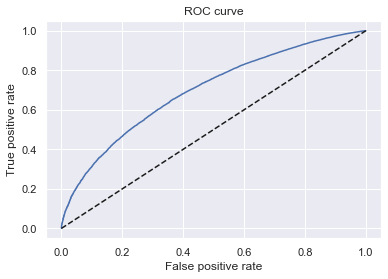

In [ ]:
plt.plot(fpr,tpr)
plt.plot(tpr,tpr, linestyle = '--', color ='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

**What is a ROC Curve?**

A Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

plot Helps visualize the trade-off between sensitivity and specificity.

* True Positive Rate (TPR): The proportion of actual positive cases that are correctly identified as positive.
* False Positive Rate (FPR): The proportion of actual negative cases that are incorrectly identified as positive.


**Understanding the AUC**

The Area Under the Curve (AUC) is a numerical value that represents the overall performance of a classification model. It is calculated by measuring the area under the ROC curve.

Higher AUC: A higher AUC indicates a better-performing model. An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 represents a random classifier.

**Interpreting the ROC Curve**

Shape of the Curve:

* Ideal Curve: A perfect classifier would have a ROC curve that hugs the top-left corner, with an AUC of 1.0.
* Random Classifier: A random classifier would have a diagonal line from the bottom-left to the top-right corner, with an AUC of 0.5.
* Real-world Classifiers: Most real-world classifiers fall somewhere between these two extremes.

Threshold Selection:

The ROC curve helps in selecting the optimal threshold for a specific use case.

By analyzing the curve, you can identify the threshold that balances sensitivity (TPR) and specificity (1-FPR) according to your specific needs.

Model Comparison:

You can compare the performance of different models by plotting their ROC curves on the same graph.
The model with the larger AUC is generally considered to be better.

In [ ]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6973264363238956

An AUC of 0.6973264363238956 indicates that the model has a moderate ability to distinguish between the positive and negative classes. While it's better than a random classifier (which would have an AUC of 0.5), it's not a perfect classifier.

### Gini Coefficient in Credit Risk Modeling

The **Gini coefficient** is a statistical measure used to assess the discriminatory power of a credit risk model. It evaluates how well a model distinguishes between different risk levels, such as defaulting and non-defaulting borrowers. In the context of credit risk modeling, a Gini coefficient of 1 indicates perfect discrimination, meaning the model can perfectly separate good from bad loans. Conversely, a Gini coefficient of 0 suggests no discriminatory power, akin to random guessing.

The Gini coefficient is calculated using the formula:

**Gini = 2 × AUROC − 1**

where **AUROC** (Area Under the Receiver Operating Characteristic Curve) measures the model's ability to differentiate between positive and negative classes. The AUROC ranges from 0.5 to 1, where 0.5 indicates no discrimination (random performance), and 1 indicates perfect discrimination.

### Role in Basel Regulations

Under the **Basel II** and **Basel III** frameworks, the Gini coefficient is utilized to evaluate the performance of credit risk models, particularly in the context of the Internal Ratings-Based (IRB) approach. These regulations emphasize the importance of model validation and backtesting, where the Gini coefficient serves as a key metric to assess the model's discriminatory power. A higher Gini coefficient indicates a model's superior ability to rank-order borrowers based on their creditworthiness, which is crucial for determining capital adequacy and managing credit risk effectively.

### Role in IFRS 9

**IFRS 9** introduces an impairment model based on **Expected Credit Losses (ECL)**, requiring entities to recognize a loss allowance for financial assets at all times. While IFRS 9 does not explicitly mandate the use of the Gini coefficient, it underscores the importance of using forward-looking information and robust credit risk models to estimate credit losses. In this context, the Gini coefficient can be a valuable tool for assessing the effectiveness of credit risk models in distinguishing between different risk levels, thereby supporting the accurate estimation of ECLs.

### Summary

The Gini coefficient is a vital metric in credit risk modeling, serving to evaluate the discriminatory power of models used under both Basel regulations and IFRS 9. By providing a quantitative measure of a model's ability to distinguish between good and bad borrowers, it aids financial institutions in developing more accurate credit risk assessments, ultimately contributing to more effective risk management and compliance with regulatory standards.


In [ ]:
# Sort the table by test_prob values in ascending order
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

# Reset the index from 0
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,226840,0,0.490543,0
1,19479,0,0.509014,0
2,2808,0,0.509383,0
3,207474,1,0.514504,0
4,230404,0,0.526574,0
...,...,...,...,...
93252,259404,1,0.991157,1
93253,256391,1,0.991207,1
93254,263771,1,0.991284,1
93255,311853,1,0.991443,1


In [ ]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - \
df_actual_predicted_probs['Cumulative N Good']
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,226840,0,0.490543,0,1,0,1
1,19479,0,0.509014,0,2,0,2
2,2808,0,0.509383,0,3,0,3
3,207474,1,0.514504,0,4,1,3
4,230404,0,0.526574,0,5,1,4
...,...,...,...,...,...,...,...
93252,259404,1,0.991157,1,93253,83108,10145
93253,256391,1,0.991207,1,93254,83109,10145
93254,263771,1,0.991284,1,93255,83110,10145
93255,311853,1,0.991443,1,93256,83111,10145


In [ ]:
df_actual_predicted_probs['Cumulative Perc Population'] = \
df_actual_predicted_probs['Cumulative N Population'] / df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = \
df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = \
df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,226840,0,0.490543,0,1,0,1,0.000011,0.000000,0.000099
1,19479,0,0.509014,0,2,0,2,0.000021,0.000000,0.000197
2,2808,0,0.509383,0,3,0,3,0.000032,0.000000,0.000296
3,207474,1,0.514504,0,4,1,3,0.000043,0.000012,0.000296
4,230404,0,0.526574,0,5,1,4,0.000054,0.000012,0.000394
...,...,...,...,...,...,...,...,...,...,...
93252,259404,1,0.991157,1,93253,83108,10145,0.999957,0.999952,1.000000
93253,256391,1,0.991207,1,93254,83109,10145,0.999968,0.999964,1.000000
93254,263771,1,0.991284,1,93255,83110,10145,0.999979,0.999976,1.000000
93255,311853,1,0.991443,1,93256,83111,10145,0.999989,0.999988,1.000000


Text(0.5, 1.0, 'Gini')

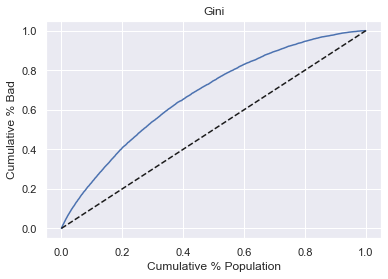

In [ ]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],
         df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Bad'],
         df_actual_predicted_probs['Cumulative Perc Bad'],
        linestyle = '--', color ='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

Gini coefficient numerically captures how far the model curve diverges from the random line, with a larger area indicating better model performance.

How It Relates to the Plot:

A steep, sharply rising curve on the Gini plot that diverges significantly from the diagonal will correspond to a high Gini coefficient, showing strong predictive power.

A more gradual curve that runs close to the diagonal line suggests a lower Gini coefficient, indicating that the model doesn’t significantly improve upon random chance.

In [ ]:
Gini = AUROC * 2 - 1
Gini

0.39465287264779114

the Gini score of 0.3946 suggests that the model has some discriminatory power but can likely be improved.

Benchmark Gini:
1. Minimum typically 40% however for newly developed models, this is too low.
2. Good model might have Gini above 60%.

### Kolmogorov-Smirnov (KS) Statistic in Credit Risk Modeling

The **Kolmogorov-Smirnov (KS)** statistic is a measure used in credit risk modeling to evaluate a model’s discriminatory power. Specifically, it quantifies the maximum separation between two cumulative distribution functions—typically the cumulative distributions of predicted probabilities for “good” (non-default) and “bad” (default) cases.

### What Does the KS Statistic Represent?

The KS statistic represents the maximum difference between the cumulative percentage of “bad” cases and the cumulative percentage of “good” cases at any point in the distribution.

This maximum difference indicates the model's ability to distinguish between the two groups (good and bad borrowers).

- The higher the KS value, the better the model is at separating good and bad cases.

### Interpretation of KS Value

- A **KS value above 0.4** is considered strong, indicating a highly effective model with excellent discriminatory power.
- A **KS value between 0.2 and 0.4** is considered moderate, showing that the model has some ability to differentiate but leaves room for improvement.
- A **KS value below 0.2** is considered weak, suggesting that the model's ability to distinguish between good and bad cases is limited.

The KS statistic is a useful tool in assessing the performance of credit risk models and can complement other metrics such as Gini coefficient and AUROC to evaluate the model’s overall effectiveness.


Text(0.5, 1.0, 'Kolmogorov-Smirnov')

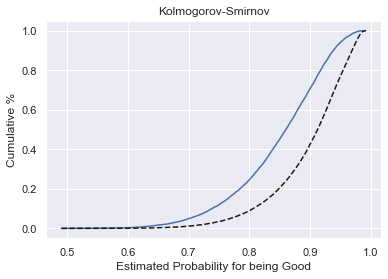

In [ ]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Good'],
        linestyle = '--', color ='k')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

A solid line showing the cumulative percentage of “bad” cases as the estimated probability increases.

A dashed line representing the cumulative percentage of “good” cases.

In [ ]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2868590857060068

The KS statistic (0.2869 or 28.69%) here is calculated as the maximum vertical distance between these two lines. This value represents the model's discriminatory power:

Since the KS value is around 0.29, this model has moderate discriminatory power in distinguishing between good and bad cases.
The point where the two lines have the maximum vertical separation indicates the threshold probability where the model is most effective in distinguishing between default and non-default cases.

# PD Model and Scorecard

In [ ]:
summary_table

,Feature name,Coefficients,P Values
0,Intercept,1.183041,NaN
1,grade:A,0.753972,1.842806e-15
2,grade:B,0.701976,1.054752e-29
3,grade:C,0.511710,7.146954e-19
4,grade:D,0.365459,2.777032e-11
...,...,...,...
65,dti:10.5-16.1,0.307883,2.498624e-07
66,dti:16.1-20.3,0.218219,2.600277e-04
67,dti:20.3-21.7,0.192728,1.997301e-03
68,dti:21.7-22.4,0.129540,5.039008e-02


In [ ]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'inq_last_6mths:>6',
 'total_acc:<=27',
 'dti:>35']

In [ ]:
#Creating a DataFrame for Reference Categories (df_ref_cat)
df_ref_cat = pd.DataFrame(columns = ['Feature name'], data = ref_categories)
df_ref_cat['Coefficients'] = 0
df_ref_cat['P Values'] = np.nan

# Concat the ref cats with summary_table
df_scorecard = pd.concat([summary_table, df_ref_cat])
df_scorecard = df_scorecard.reset_index()
df_scorecard.drop(['index'], axis= 1, inplace = True)

# Extract original feature name
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,Feature name,Coefficients,P Values,Original feature name
0,Intercept,1.183041,NaN,Intercept
1,grade:A,0.753972,1.842806e-15,grade
2,grade:B,0.701976,1.054752e-29,grade
3,grade:C,0.511710,7.146954e-19,grade
4,grade:D,0.365459,2.777032e-11,grade
...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d
79,int_rate:>20.281,0.000000,NaN,int_rate
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths
81,total_acc:<=27,0.000000,NaN,total_acc


In [ ]:
#Groups the data by 'Original feature name' and computes the minimum and maximum coefficients within each group.

df_scorecard_group_min = df_scorecard.groupby('Original feature name')['Coefficients'].min()
df_scorecard_group_max = df_scorecard.groupby('Original feature name')['Coefficients'].max()

In [ ]:
pd.set_option('display.max_rows', None)
df_scorecard_group_min

Original feature name
Intercept                      1.183041
addr_state                     0.000000
annual_inc                     0.137440
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -1.439681
int_rate                       0.000000
mths_since_earliest_cr_line   -0.036516
mths_since_issue_d            -0.349463
open_acc                       0.052705
purpose                        0.000000
term                           0.000000
total_acc                     -0.021388
verification_status            0.000000
Name: Coefficients, dtype: float64

In [ ]:
#Summing the Minimum Coefficients
min_sum_coef = df_scorecard_group_min.sum()
min_sum_coef

-0.47386076114530706

In [ ]:
#Summing the Maximum Coefficients
max_sum_coef = df_scorecard_group_max.sum()
max_sum_coef

6.344718358572715

In [ ]:
min_score = 300
max_score = 850

Score Calculation (Normalization)

Score = (Coefficient) * (Max Score - Min Score / Max Sum Coefficients - Min Sum Coefficients)

In [ ]:
df_scorecard['Score - Calculation'] = \
df_scorecard['Coefficients']*(max_score - min_score)/(max_sum_coef - min_sum_coef)
pd.set_option('display.max_rows', 10)
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation
0,Intercept,1.183041,NaN,Intercept,95.426418
1,grade:A,0.753972,1.842806e-15,grade,60.816866
2,grade:B,0.701976,1.054752e-29,grade,56.622787
3,grade:C,0.511710,7.146954e-19,grade,41.275566
4,grade:D,0.365459,2.777032e-11,grade,29.478631
...,...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d,0.000000
79,int_rate:>20.281,0.000000,NaN,int_rate,0.000000
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000
81,total_acc:<=27,0.000000,NaN,total_acc,0.000000


Intercept Score formula

intercept_score = ((max_score - min_score) / (max_sum_coef - min_sum_coef)) * (first_feature_coef - min_sum_coef) + min_score

In [ ]:
#Calculate the intercept
df_scorecard['Score - Calculation'][0] = \
(max_score - min_score)/(max_sum_coef - min_sum_coef) * \
(df_scorecard['Coefficients'][0] - min_sum_coef) + min_score
df_scorecard

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Feature name,Coefficients,P Values,Original feature name,Score - Calculation
0,Intercept,1.183041,NaN,Intercept,433.648959
1,grade:A,0.753972,1.842806e-15,grade,60.816866
2,grade:B,0.701976,1.054752e-29,grade,56.622787
3,grade:C,0.511710,7.146954e-19,grade,41.275566
4,grade:D,0.365459,2.777032e-11,grade,29.478631
...,...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d,0.000000
79,int_rate:>20.281,0.000000,NaN,int_rate,0.000000
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000
81,total_acc:<=27,0.000000,NaN,total_acc,0.000000


In [ ]:
# Round the scores
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,1.183041,NaN,Intercept,433.648959,434.0
1,grade:A,0.753972,1.842806e-15,grade,60.816866,61.0
2,grade:B,0.701976,1.054752e-29,grade,56.622787,57.0
3,grade:C,0.511710,7.146954e-19,grade,41.275566,41.0
4,grade:D,0.365459,2.777032e-11,grade,29.478631,29.0
...,...,...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d,0.000000,0.0
79,int_rate:>20.281,0.000000,NaN,int_rate,0.000000,0.0
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000,0.0
81,total_acc:<=27,0.000000,NaN,total_acc,0.000000,0.0


In [ ]:
# Check if the sum of the scores would be correct
min_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [ ]:
max_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel
# Have to subtract the 1 extra point

851.0

In [ ]:
df_scorecard['Difference'] = \
df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
pd.options.display.max_rows = 30
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,Intercept,1.183041,NaN,Intercept,433.648959,434.0,0.351041
1,grade:A,0.753972,1.842806e-15,grade,60.816866,61.0,0.183134
2,grade:B,0.701976,1.054752e-29,grade,56.622787,57.0,0.377213
3,grade:C,0.511710,7.146954e-19,grade,41.275566,41.0,-0.275566
4,grade:D,0.365459,2.777032e-11,grade,29.478631,29.0,-0.478631
...,...,...,...,...,...,...,...
78,mths_since_issue_d:>84,0.000000,NaN,mths_since_issue_d,0.000000,0.0,0.000000
79,int_rate:>20.281,0.000000,NaN,int_rate,0.000000,0.0,0.000000
80,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000,0.0,0.000000
81,total_acc:<=27,0.000000,NaN,total_acc,0.000000,0.0,0.000000


### Code Explanation: Calculating Maximum Difference by Feature Category

This code calculates the **maximum difference** between the preliminary score and the calculated score for each parent category, based on the 'Original feature name'. Here’s a step-by-step breakdown:

- **Objective**: The goal is to compute the difference between the **Score** and **Preliminary** values for each feature category and capture only the rows with the highest difference for each category.

#### Key Steps:
1. **Checking Maximum Score**: For each feature category, the code first identifies the **maximum score** (`Score - Preliminary` difference) across all rows.
  
2. **Recording Maximum Differences**: Only the rows with the highest **Score - Preliminary** difference for a specific feature category will have their value recorded in the **max_difference** list.
   
3. **Final Output**: The **max_difference** list will contain the difference for rows that hold the highest score difference for their respective categories. For all other rows, the difference is recorded as **0**.

#### Example:
- For each **'Original feature name'**, the code will compute the difference between **Score** and **Preliminary**.
- It will then identify the row with the highest difference for each feature category.
- The **max_difference** list will contain these highest differences, with other rows marked as 0, ensuring only the most significant differences are captured.

This method helps in isolating the most important deviations for each feature category while ensuring the result is easy to interpret.


In [ ]:
# Find the max score among each parent category

ind = list(df_scorecard.index) #Create an index list
max_difference = [] #Create an empty set to store max difference for each cat
for i in ind:
    ori_name = df_scorecard['Original feature name'][i]
    this_score = df_scorecard['Score - Preliminary'][i]
    max_score_t = df_scorecard.loc[df_scorecard['Original feature name']
                               == ori_name]['Score - Preliminary'].max()
    this_diff = df_scorecard['Difference'][i]

    if this_score == max_score_t:
        max_difference.append(this_diff)
    else:
        max_difference.append(0)

In [ ]:
# Assign the calculated max differences to the new 'Max_Difference' column
df_scorecard['Max_Difference'] = max_difference

# Set the 'Max_Difference' for the first row to 0 explicitly
df_scorecard['Max_Difference'][0] = 0

pd.options.display.max_rows = None
df_scorecard

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Max_Difference
0,Intercept,1.183041,NaN,Intercept,433.648959,434.0,0.351041,0.000000
1,grade:A,0.753972,1.842806e-15,grade,60.816866,61.0,0.183134,0.183134
2,grade:B,0.701976,1.054752e-29,grade,56.622787,57.0,0.377213,0.000000
3,grade:C,0.511710,7.146954e-19,grade,41.275566,41.0,-0.275566,0.000000
4,grade:D,0.365459,2.777032e-11,grade,29.478631,29.0,-0.478631,0.000000
5,grade:E,0.250431,2.992781e-07,grade,20.200270,20.0,-0.200270,0.000000
6,grade:F,0.108543,3.326276e-02,grade,8.755302,9.0,0.244698,0.000000
7,home_ownership:OWN,0.083602,3.402758e-05,home_ownership,6.743486,7.0,0.256514,0.000000
8,home_ownership:MORTGAGE,0.107817,1.356195e-17,home_ownership,8.696746,9.0,0.303254,0.303254
9,addr_state:OK_TN_MO_LA_MD_NC,0.038153,5.875137e-02,addr_state,3.077479,3.0,-0.077479,0.000000


Identifying the row with the largest maximum difference and then adjust its final score slightly (by subtracting 1). done to fine-tune or correct for scoring inconsistencies, ensuring that the scorecard behaves as expected.

In [ ]:
# Get the index of the row with the highest max difference
max_diff_ind = df_scorecard['Max_Difference'].idxmax()
# Copy the preliminary scores to create a new 'Score - Final' column
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
# Subtract 1 from the 'Score - Final' for the row with the highest max difference
df_scorecard['Score - Final'][max_diff_ind] = df_scorecard['Score - Final'][max_diff_ind] - 1

C:\Users\prem kumarr r s\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
max_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

In [ ]:
min_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

# Calculating credit scores

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [ ]:
pd.options.display.max_rows = 10

In [ ]:
# Add a 'intercept' column
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35
115315,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
420540,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
76957,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
114743,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
365207,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312682,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
165513,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
242391,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
166140,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Make the column order match the row order of the scorecard df
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_TN_MO_LA_MD_NC,...,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,inq_last_6mths:>6,total_acc:<=27,dti:>35
115315,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
420540,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
76957,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
114743,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
365207,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312682,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
165513,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
242391,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
166140,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
scorecard_scores = df_scorecard['Score - Preliminary']
scorecard_scores.shape

(83,)

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 83)

In [ ]:
# Reshape the scorecard_scores
scorecard_scores = scorecard_scores.values.reshape(scorecard_scores.shape[0],1)
scorecard_scores.shape

(83, 1)

In [ ]:
#Calculate credit scores all accounts
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores

,0
115315,561.0
420540,591.0
76957,556.0
114743,476.0
365207,644.0
...,...
312682,597.0
165513,549.0
242391,502.0
166140,496.0


# Credit Score to PD

In [ ]:
#Convert PD to sum of the coeffs
#convert credit scores back to the sum of coefficients that contributed to those scores.
#This allows for a reverse mapping from the scaled credit score to the underlying sum of the feature coefficients that produced it.
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
sum_coef_from_score

,0
115315,2.761865
420540,3.133787
76957,2.699878
114743,1.708085
365207,3.790851
...,...
312682,3.208172
165513,2.613096
242391,2.030417
166140,1.956033


### Predicted Probability from Sum of Coefficients

In credit risk modeling and classification tasks, the **predicted probability** represents the likelihood of an event (e.g., default) based on the input features. To transform a score (e.g., from a sum of coefficients) into a probability, we apply the **logistic function**.

The logistic function is commonly used in credit scoring models to map a raw score (which can be any real value) to a probability between 0 and 1. This transformation is crucial because it allows the model's predictions to be interpreted as probabilities, which can then be used for decision-making (e.g., whether to approve or reject a loan application).

#### Formula:
The predicted probability can be calculated using the following logistic function:

\[
P(\text{default}) = \frac{1}{1 + e^{-\text{sum\_coef\_from\_score}}}
\]

Where:
- \( P(\text{default}) \) is the predicted probability of an event, such as default.
- \( \text{sum\_coef\_from\_score} \) is the sum of the coefficients, typically derived from the model’s feature weights and the input features.
- \( e \) is the base of the natural logarithm.

### Interpretation:

- **Logistic Function**: This function ensures that the predicted probability is always between 0 and 1.
- **Credit Risk Models**: The output probability can be interpreted as the likelihood that the borrower will default on the loan. For example, a probability of 0.8 means there is an 80% chance of default.

By transforming the raw score into a probability, we can make more informed decisions about credit risk, such as setting thresholds for loan approval or applying risk-based pricing.


In [ ]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
115315,0.940580
420540,0.958265
76957,0.937019
114743,0.846588
365207,0.977922


# Setting Cut-offs

In [ ]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,226840,0,0.490543,0,1,0,1,0.000011,0.000000,0.000099
1,19479,0,0.509014,0,2,0,2,0.000021,0.000000,0.000197
2,2808,0,0.509383,0,3,0,3,0.000032,0.000000,0.000296
3,207474,1,0.514504,0,4,1,3,0.000043,0.000012,0.000296
4,230404,0,0.526574,0,5,1,4,0.000054,0.000012,0.000394
...,...,...,...,...,...,...,...,...,...,...
93252,259404,1,0.991157,1,93253,83108,10145,0.999957,0.999952,1.000000
93253,256391,1,0.991207,1,93254,83109,10145,0.999968,0.999964,1.000000
93254,263771,1,0.991284,1,93255,83110,10145,0.999979,0.999976,1.000000
93255,311853,1,0.991443,1,93256,83111,10145,0.999989,0.999988,1.000000


In [ ]:
#we need the confusion matrix again
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs.y_hat_test_proba>=tr,1,0)

#creating a confusion matrix
print(pd.crosstab(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test, rownames = ['Actual'], colnames = ['Predicted']))
#checking accuracy
print('Accuracy : ',metrics.accuracy_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test))

Predicted      0      1
Actual                 
0           7177   2968
1          35409  47703
Accuracy :  0.5884812936294327


In [ ]:
#checking roc curves
fpr, tpr, thresholds = metrics.roc_curve(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test_proba)

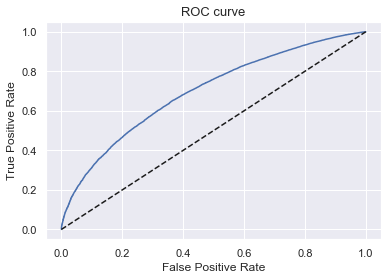

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, '--k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve',size = 13)
plt.show()

In [ ]:
#checking area under the roc curvre
roc_auc = metrics.roc_auc_score(df_actual_predicted_probs.loan_data_targets_test, df_actual_predicted_probs.y_hat_test_proba)
roc_auc

0.6973264363238956

In [ ]:
thresholds.shape

(17750,)

In [ ]:
#concatenate fpr, tpr and thresholds in a single dataframe
df_cutoffs = pd.DataFrame(data = thresholds, columns = ['Thresholds'])
df_cutoffs.shape

(17750, 1)

In [ ]:
df_cutoffs['FPR'] = fpr
df_cutoffs['TPR'] = tpr
df_cutoffs.head()

,Thresholds,FPR,TPR
0,1.991488,0.0,0.000000
1,0.991488,0.0,0.000012
2,0.990010,0.0,0.000313
3,0.989954,0.0,0.000337
4,0.989783,0.0,0.000373


Setting this value close to 1 ensures that the model's scoring range is broad enough to cover high scores effectively without reaching exactly 1, which can sometimes cause issues in logistic transformations.

In [ ]:
df_cutoffs['Thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

calculating credit scores for each threshold value in df_cutoffs, converting logistic probabilities (thresholds) to a familiar scoring range (e.g., 300–850) by reversing the logistic transformation and aligning scores with the model’s defined range.

In [ ]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['Thresholds'] / (1 - df_cutoffs['Thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [ ]:
df_cutoffs.head()

,Thresholds,FPR,TPR,Score
0,1.000000,0.0,0.000000,2061.0
1,0.991488,0.0,0.000012,722.0
2,0.990010,0.0,0.000313,709.0
3,0.989954,0.0,0.000337,709.0
4,0.989783,0.0,0.000373,707.0


In [ ]:
#setting the first score as max score
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,Thresholds,FPR,TPR,Score
0,1.000000,0.0,0.000000,850.0
1,0.991488,0.0,0.000012,722.0
2,0.990010,0.0,0.000313,709.0
3,0.989954,0.0,0.000337,709.0
4,0.989783,0.0,0.000373,707.0


This function returns the number of rows with a predicted probability greater than or equal to p, which could represent the count of approved applications or accepted predictions in a credit approval or classification scenario.

By adjusting p, you can quickly see how many predictions meet various probability thresholds, making it useful for analyzing approval rates at different cutoff levels in a credit scoring or risk assessment model.

In [ ]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold.
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

This code provides a comprehensive view of how the number of approved and rejected applications and their corresponding rates change at different probability thresholds. This allows for:

Threshold Analysis: By adjusting the probability threshold, one can see how many applications would be approved or rejected.

Decision-Making Insights: This is particularly useful in credit risk and lending, where the approval/rejection criteria can be fine-tuned based on the desired risk tolerance or business strategy.

In [ ]:
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Approved'] = df_cutoffs['Thresholds'].apply(n_approved)

# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

# Rejection rate equals one minus approval rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [ ]:
df_cutoffs

,Thresholds,FPR,TPR,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.991488,0.000000,0.000012,722.0,1,93256,0.000011,0.999989
2,0.990010,0.000000,0.000313,709.0,26,93231,0.000279,0.999721
3,0.989954,0.000000,0.000337,709.0,28,93229,0.000300,0.999700
4,0.989783,0.000000,0.000373,707.0,31,93226,0.000332,0.999668
...,...,...,...,...,...,...,...,...
17745,0.539874,0.999507,0.999976,351.0,93250,7,0.999925,0.000075
17746,0.536378,0.999507,0.999988,350.0,93251,6,0.999936,0.000064
17747,0.526574,0.999704,0.999988,347.0,93253,4,0.999957,0.000043
17748,0.514504,0.999704,1.000000,343.0,93254,3,0.999968,0.000032


top 5 rows reflect a conservative, risk-averse strategy, approving only a few highly creditworthy applications while rejecting nearly all, resulting in high credit scores and low TPR and FPR values.

Bottom 5 rows reflect a lenient strategy, approving nearly all applications, with a high approval rate, low credit scores, and high FPR and TPR, indicating a higher risk tolerance.

In [ ]:
df_cutoffs.iloc[1000: 2000, ]

,Thresholds,FPR,TPR,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.954194,0.046723,0.199105,583.0,17022,76235,0.182528,0.817472
1001,0.954192,0.046821,0.199105,583.0,17023,76234,0.182539,0.817461
1002,0.954160,0.046821,0.199345,583.0,17043,76214,0.182753,0.817247
1003,0.954159,0.047018,0.199345,583.0,17045,76212,0.182774,0.817226
1004,0.954128,0.047018,0.199574,583.0,17064,76193,0.182978,0.817022
...,...,...,...,...,...,...,...,...
1995,0.938960,0.096698,0.306671,559.0,26469,66788,0.283829,0.716171
1996,0.938956,0.096895,0.306671,559.0,26471,66786,0.283850,0.716150
1997,0.938896,0.096895,0.307116,559.0,26508,66749,0.284247,0.715753
1998,0.938891,0.096994,0.307116,559.0,26509,66748,0.284257,0.715743


If the cutoff score is 583, only about 18% of the applications will be accepted for credit.

In [3]:
df_scorecard.to_csv('df_scorecard.csv')

NameError: name 'df_scorecard' is not defined

In [ ]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')